# **PW SKILLS**
## **BOOSTING TECHNIQUES ASSIGNMENT**

## **Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.**

Answer:
Boosting is an ensemble learning technique that combines multiple weak learners (usually shallow decision trees) to create a strong predictive model. Unlike bagging, which trains models independently in parallel, boosting builds models sequentially. Each new model focuses on correcting the errors made by the previous ones.

How it improves weak learners:

Weighted focus on errors: In boosting, misclassified samples are given higher weights so that the next learner focuses more on those difficult cases.

Sequential learning: Each model learns from the mistakes of its predecessor, gradually improving accuracy.

Reduction in bias & variance: Boosting reduces both bias (by correcting mistakes) and variance (through aggregation of multiple models).

Final strong learner: The weighted majority vote (classification) or weighted average (regression) of weak learners results in a highly accurate final model.

In short, boosting transforms weak learners into a powerful strong learner by sequentially reducing errors.

## **Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

Answer:
Both AdaBoost and Gradient Boosting are boosting algorithms, but they differ in their approach to error correction:

Error Handling Approach:

AdaBoost (Adaptive Boosting): Assigns weights to data points. Misclassified samples get higher weights, and the next learner focuses more on them.

Gradient Boosting: Uses gradient descent optimization. It minimizes a loss function by fitting new learners to the residual errors of previous models.

Training Mechanism:

AdaBoost: Sequentially adjusts sample weights based on errors.

Gradient Boosting: Sequentially fits models to the negative gradient of the loss function.

Flexibility:

AdaBoost: Works best with classification problems.

Gradient Boosting: More flexible, works with classification, regression, and ranking tasks.

Summary: AdaBoost corrects errors by reweighting misclassified samples, whereas Gradient Boosting corrects errors by optimizing a loss function via gradient descent.

## Question 3: How does regularization help in **XGBoost**?

Answer:
Regularization in XGBoost is one of the key reasons for its success. It controls model complexity and prevents overfitting.

Types of Regularization in XGBoost:

L1 Regularization (Lasso): Shrinks coefficients and can eliminate irrelevant features by setting their weights to zero.

L2 Regularization (Ridge): Smooths large weights to avoid over-reliance on specific features.

Tree-specific regularization: Parameters like max_depth, min_child_weight, and subsample control tree growth and prevent overly complex models.

Benefits:

Prevents overfitting by penalizing overly complex models.

Improves generalization on unseen data.

Encourages sparsity, making the model faster and more interpretable.

Thus, regularization in XGBoost strikes a balance between model complexity and predictive performance.

## Question 4: Why is CatBoost considered efficient **for** handling categorical data?

Answer:
CatBoost (Categorical Boosting) is specifically designed to handle categorical features efficiently without extensive preprocessing.

Reasons why CatBoost is efficient:

No need for one-hot encoding: It directly handles categorical variables using permutation-based statistics.

Efficient encoding: Converts categorical values into numerical form by calculating average target values in a way that avoids target leakage.

Ordered boosting: Reduces prediction shift and prevents overfitting when dealing with categorical features.

Fast and user-friendly: Automatically detects categorical variables and handles them internally.

Advantage: Unlike other boosting algorithms (like XGBoost or LightGBM) that require manual encoding, CatBoost natively processes categorical features, saving time and improving accuracy.

## **Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?**

Answer:
Boosting is often preferred over bagging when high accuracy and error reduction are critical. Some applications include:

Fraud Detection: Boosting models like XGBoost and LightGBM are widely used to detect fraudulent transactions due to their ability to capture complex relationships.

Credit Scoring & Loan Default Prediction: Boosting handles imbalanced datasets better, making it ideal for financial risk analysis.

Medical Diagnosis: In healthcare, boosting models help in early disease detection (e.g., cancer detection using medical datasets).

E-commerce Recommendations: Boosting algorithms are used to predict customer preferences and improve recommendation systems.

Search Engine Ranking: Gradient Boosting is used by search engines to rank web pages based on relevance.

Summary: Boosting techniques excel in applications requiring high precision and robustness, often outperforming bagging methods like Random Forest.

## Question 6: Train an AdaBoost Classifier on the Breast **Cancer** dataset and print accuracy

Answer:
AdaBoost (Adaptive Boosting) works by combining many weak learners (usually shallow decision trees). Each subsequent learner pays more attention to the samples that were misclassified earlier, which helps improve overall performance.

In [6]:
#QUESTION 6:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Train AdaBoost model
model = AdaBoostClassifier(n_estimators=200, learning_rate=0.5, random_state=42)
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("AdaBoost Accuracy:", round(accuracy, 4))


AdaBoost Accuracy: 0.958


## **Question 7: Train a Gradient Boosting Regressor on the California Housing dataset and evaluate with R-squared**

Answer:
Gradient Boosting builds models sequentially, where each new model corrects the errors of the previous one by fitting to the residuals. For regression, performance can be measured using the R-squared (R²) score, which indicates how much variance in the target is explained by the model.

In [7]:
#QUESTION 7:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predictions and evaluation
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting R^2 Score:", round(r2, 4))


Gradient Boosting R^2 Score: 0.7957


## **Question 8: Train an XGBoost Classifier on the Breast Cancer dataset, tune learning_rate using GridSearchCV, and print best parameters & accuracy**

Answer:
XGBoost is an advanced boosting algorithm with built-in regularization and fast performance. The learning_rate parameter controls how much each tree contributes to the overall model. A proper value is found using GridSearchCV.

In [8]:
#QUESTION 8
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Define model
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=3,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

# Hyperparameter tuning for learning_rate
param_grid = {"learning_rate": [0.01, 0.05, 0.1, 0.2]}
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print("Test Accuracy:", round(accuracy, 4))


Best Parameters: {'learning_rate': 0.2}
Test Accuracy: 0.965


## **Question** 9: Train a CatBoost Classifier and plot the confusion matrix using seaborn

Answer:
CatBoost is a boosting algorithm optimized for categorical and tabular data. It avoids extensive preprocessing and reduces overfitting through ordered boosting. A confusion matrix helps visualize classification performance.

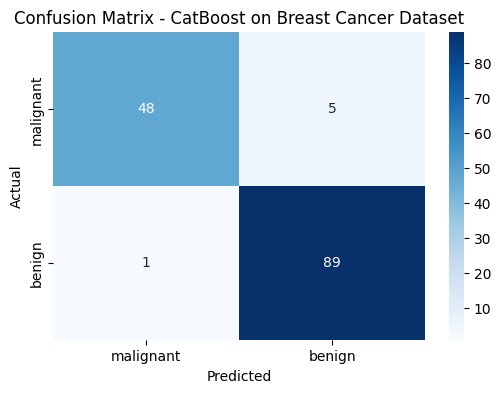

In [9]:
#QUESTION 9:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Train CatBoost model (silent=True to suppress training logs)
model = CatBoostClassifier(iterations=300, depth=6, learning_rate=0.1, random_state=42, verbose=0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost on Breast Cancer Dataset")
plt.show()


In [10]:
!pip install catboost

## **Question 10: FinTech loan default prediction pipeline using boosting techniques**

Answer:
When predicting loan default in a FinTech setting, the dataset often has challenges like imbalance, missing values, and mixed feature types. Boosting methods are well-suited due to their robustness.

Step-by-Step Pipeline:

Data Preprocessing

Handle missing values: impute numeric features with median, categorical with most frequent.

Encode categorical variables: CatBoost can handle them directly; otherwise, use one-hot or target encoding.

Normalize/scale numerical features if needed.

Choice of Algorithm

AdaBoost: Works for simpler, balanced datasets but less effective on imbalanced ones.

XGBoost: Strong for large-scale numeric data with powerful regularization.

CatBoost: Ideal when categorical features are significant.

In this case, CatBoost or XGBoost would be preferred.

Hyperparameter Tuning

Use GridSearchCV or RandomizedSearchCV to tune learning_rate, max_depth, and n_estimators.

For imbalanced data, adjust scale_pos_weight in XGBoost or use class weights.

Evaluation Metrics

Since the dataset is imbalanced, accuracy is misleading.

Use Precision, Recall, F1-score, and AUC-ROC.

AUC is especially useful for ranking customers by default risk.

Business Benefits

Improved accuracy reduces financial risk by correctly identifying likely defaulters.

Better recall ensures fewer defaulters slip through undetected.

Helps design fair lending policies and personalized offers.

In [11]:
#QUESTION 10:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.datasets import make_classification

# Simulated imbalanced dataset (replace with real loan dataset)
X, y = make_classification(n_samples=2000, n_features=20, weights=[0.8,0.2], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# XGBoost with imbalance handling
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=4,   # weight to handle imbalance
    random_state=42,
    eval_metric="logloss"
)
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       479
           1       0.83      0.83      0.83       121

    accuracy                           0.93       600
   macro avg       0.89      0.90      0.89       600
weighted avg       0.93      0.93      0.93       600

ROC-AUC Score: 0.967511516761849
